In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200515052504-0000
KERNEL_ID = 64df6872-2cf8-425e-bcb3-a417473c082e


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


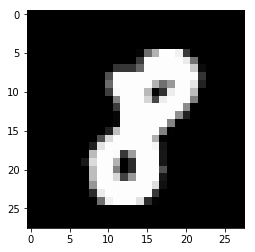

In [14]:
batch_xs, batch_ys = mnist.train.next_batch(1)  #everytime we run this a new number image is displayed
X = batch_xs
X = X.reshape([28,28])
plt.gray()
print(batch_ys)  #to print the label(which is a one_hot encoded vector)
plt.imshow(X)

In [34]:
#in a paceholder the data is fed in during the execution time
#(basically used to add data during training which takes places after computational graph) and 784 is the no.of elements
x = tf.placeholder(tf.float32, [None, 784])   
#to retrieve during training whereas placeholder is meant to keep training data. 
#Weight matrix with 784 weights in one axis. 10 is no.of times to run 10 regression models in parallel
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10])) #bias vector--one for each softmax regression model
#we will now join the nodes together to form a computational graph, softmax and matmul expect tensorflow variables as parameters
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [35]:
#another placeholder created for training level spike. It is mentioned 10 because it is the one hot encoded vector labelling the image
y_ = tf.placeholder(tf.float32, [None, 10])

In [36]:
#now we define the cost function as cross-entropy. tf.reduce_sum is the product of the desired value and the log of the actual fuction
#reduction_indices defines the dimension of the Tensor the aggregation must take place. 
#y is a matrix of 10 column and N rows, N stands for the no.of creating examples 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [37]:
#we next use the GradientDescentOptimizer with learning rate of 0 to 5, to the w and b w.r.t the cross-entropy function
#therefore tensorflow shall take care of gradient and backpropogation task automatically
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Instructions for updating:
Use tf.cast instead.


In [38]:
sess = tf.InteractiveSession()

In [40]:
tf.global_variables_initializer().run() #initializing all the global variables

In [43]:
for _ in range(1000): #gradient descent loop
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [44]:
#evaluating the performance of test set from mnist. 
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1)) 

In [46]:
#accuracy is a node in the computational graph. Therefore, we need a tensorflow session to execute it.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [47]:
#we assign the test dataset to the graph
print (sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))

0.9123
